In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import requests, io

from astropy.table import Table
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
# For downloading files
from astropy.utils.data import download_file

import pyvo as vo

# There are a number of relatively unimportant warnings that show up, so for now, suppress them:
import warnings
warnings.filterwarnings("ignore", module="astropy.io.votable.*")
warnings.filterwarnings("ignore", module="pyvo.utils.xml.*")

In [2]:
services = vo.regsearch(servicetype='ssa',waveband='x-ray')
services.to_table()['ivoid','short_name']

ivoid,short_name
object,object
ivo://nasa.heasarc/chanmaster,Chandra
ivo://nasa.heasarc/intbsc,INTEGRAL/BSC
ivo://ned.ipac/sed_data_near_position,NED/SED
ivo://wfau.roe.ac.uk/heavens_at_isdc/light-curves,HEAVENS @ ISDC


In [3]:
chandra_service = [s for s in services if 'Chandra' in s.short_name][0] 
chandra_service.access_url

'https://heasarc.gsfc.nasa.gov/xamin/vo/ssa?table=chanmaster&'

In [17]:
delori = SkyCoord.from_name("Cassiopeia A")

spec_tables = chandra_service.search(pos=delori,diameter=0.1)
spec_tables.to_table().show_in_notebook()

idx,obsid,status,name,ra,dec,time,detector,grating,exposure,type,pi,public_date,SSA_start_time,SSA_tmid,SSA_stop_time,SSA_duration,SSA_coord_obs,SSA_ra,SSA_dec,SSA_title,SSA_reference,SSA_datalength,SSA_datamodel,SSA_instrument,SSA_publisher,SSA_format,SSA_fov,SSA_wavelength_min,SSA_wavelength_max,SSA_bandwidth,SSA_bandpass
,,,,deg,deg,mjd,,,s,,,mjd,mjd,mjd,mjd,s,deg,deg,deg,,,,,,,,deg,meter,meter,meter,meter
0,1046,archived,CAS A,350.86667,58.81181,52054.7113,ACIS-S,HETG,69930,GTO,Canizares,52431,52054.7112962963,52055.129538609435,52055.547036310876,69930.0,--,350.86667,58.81181,acisf01046N003_pha2,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/science/ao02/cat5/1046/primary/acisf01046N003_pha2.fits.gz,12.0,Spectrum-1.0,ACIS-S,HEASARC,application/fits,0.81,1.2398e-10,6.1992e-09,6.07522e-09,3.16159e-09
1,10703,archived,Cassiopeia A,350.86625,58.81181,55313.9538,ACIS-S,HETG,35110,GTO,Canizares,55683,55313.95375,55314.17167939948,55314.38884535382,35110.0,--,350.86625,58.81181,acisf10703N002_pha2,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/science/ao10/cat5/10703/primary/acisf10703N002_pha2.fits.gz,12.0,Spectrum-1.0,ACIS-S,HEASARC,application/fits,0.81,1.2398e-10,6.1992e-09,6.07522e-09,3.16159e-09
2,12206,archived,Cassiopeia A,350.86625,58.81181,55315.4532,ACIS-S,HETG,35050,GTO,Canizares,55683,55315.4531597222,55315.671631732694,55315.889337472916,35050.0,--,350.86625,58.81181,acisf12206N002_pha2,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/science/ao10/cat5/12206/primary/acisf12206N002_pha2.fits.gz,12.0,Spectrum-1.0,ACIS-S,HEASARC,application/fits,0.81,1.2398e-10,6.1992e-09,6.07522e-09,3.16159e-09


In [5]:
file_name = download_file(spec_tables[0].getdataurl(),cache=True)
hdu_list = fits.open(file_name)

In [6]:
spec_table = Table(hdu_list[1].data)
spec_table

SPEC_NUM,TG_M,TG_PART,TG_SRCID,X,Y,CHANNEL [8192],COUNTS [8192],STAT_ERR [8192],BACKGROUND_UP [8192],BACKGROUND_DOWN [8192],BIN_LO [8192],BIN_HI [8192]
int16,int16,int16,int16,float32,float32,int16,int16,float32,int16,int16,float64,float64
1,-3,1,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,7.159166666667378 .. 0.3333333333333333,7.160000000000712 .. 0.33416666666666667
2,-2,1,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,10.738750000000886 .. 0.5,10.740000000000887 .. 0.50125
3,-1,1,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,21.477500000001772 .. 1.0,21.480000000001773 .. 1.0025
4,1,1,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,21.477500000001772 .. 1.0,21.480000000001773 .. 1.0025
5,2,1,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,10.738750000000886 .. 0.5,10.740000000000887 .. 0.50125
6,3,1,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,7.159166666667378 .. 0.3333333333333333,7.160000000000712 .. 0.33416666666666667
7,-3,2,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,13.985000000001373 .. 0.3333333333333333,13.98666666666804 .. 0.33499999999999996
8,-2,2,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,20.977500000001505 .. 0.5,20.980000000001507 .. 0.5025
9,-1,2,1,4102.815,4131.828,1 .. 8192,0 .. 0,1.8660254 .. 1.8660254,0 .. 0,0 .. 0,41.95500000000301 .. 1.0,41.960000000003014 .. 1.005


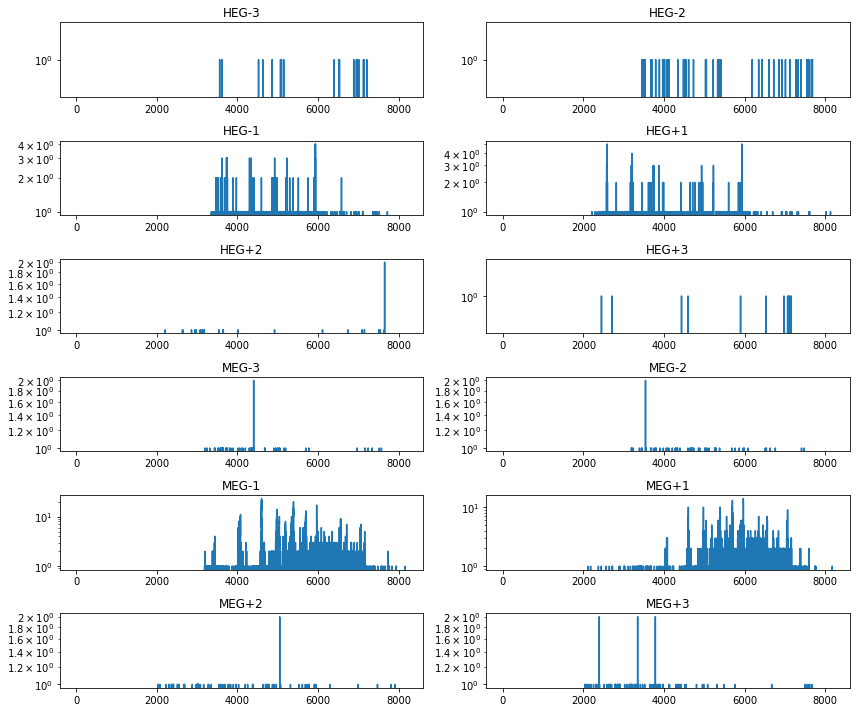

In [7]:
matplotlib.rcParams['figure.figsize'] = (12, 10)

for i in range(len(spec_table)): 
    
    ax = plt.subplot(6,2,i+1)
    pha = plt.plot( spec_table['CHANNEL'][i],spec_table['COUNTS'][i])
    ax.set_yscale('log')
    
    if spec_table['TG_PART'][i] == 1:
        instr='HEG'
    if spec_table['TG_PART'][i] == 2:
        instr='MEG'
    if spec_table['TG_PART'][i] == 3:
        instr='LEG'
        
    ax.set_title("{grating}{order:+d}".format(grating=instr, order=spec_table['TG_M'][i]))
    
    plt.tight_layout()